In [190]:
import os, pickle, sqlite3
import matplotlib.pyplot as plt
import matplotlib.pylab as pyl

In [191]:
directory = input('Enter the full path to the directory where the feedback data is stored:\n')
options = [x for x in os.listdir(directory) if x.endswith('.pkl')]
choice = input('Type the filename of the file you want to work with:\n' + str(options) + '\n')
with open(os.path.join(directory, choice), 'rb') as f:
    data = pickle.load(f)

In [192]:
timestamps = []
for x in range(len(data)):
    for y in data[x].keys():
        timestamps.append(y)

In [193]:
if input('Do you want to work with data from the sqlite database? [y/n]').lower() == 'y':
    db = sqlite3.Connection('db.sqlite')
    curs = db.cursor()
    tables = curs.execute("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;").fetchall()[2:]
    tables = [x[0] for x in tables]
    for x in tables:
        start_time = curs.execute('SELECT MIN(Timestamp) FROM ' + x + ';').fetchall()[0][0]
        if start_time > timestamps[0] and start_time < timestamps[-1]:
            table = x
            break
    try:
        print('Using table: ' + table)
    except TypeError:
        print('Could not find a table with timestamps matching EEG data.')
        print('current directory: ' + os.getcwd())
        table = None
        curs.close()
        db.close()

Using table: test7


In [194]:
deltas = []
thetas = []
alphas = []
betas = []
gammas = []

In [195]:
for x in range(len(data)):
    for y in data[x].values():
        for z in range(len(y[0])):
            if z == 0:
                deltas.append(y[0][z])
            elif z == 1:
                thetas.append(y[0][z])
            elif z == 2:
                alphas.append(y[0][z])
            elif z == 3:
                betas.append(y[0][z])
            elif z == 4:
                gammas.append(y[0][z])

In [196]:
smooth_deltas = []
smooth_thetas = []
smooth_alphas = []
smooth_betas = []
smooth_gammas = []

In [197]:
for x in range(len(data)):
    for y in data[x].values():
        for z in range(len(y[1])):
            if z == 0:
                smooth_deltas.append(y[1][z])
            elif z == 1:
                smooth_thetas.append(y[1][z])
            elif z == 2:
                smooth_alphas.append(y[1][z])
            elif z == 3:
                smooth_betas.append(y[1][z])
            elif z == 4:
                smooth_gammas.append(y[1][z])

In [198]:
if table:
    corrects = curs.execute('select timestamp from ' + table + ' where Correct=1;').fetchall()
    incorrects = curs.execute('select timestamp from ' + table + ' where Correct=0;').fetchall()

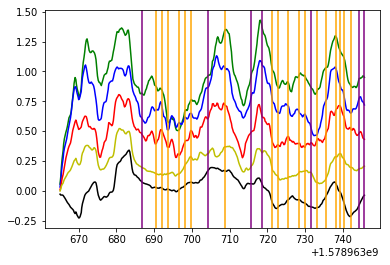

In [199]:
pyl.plot(timestamps, smooth_deltas, color='g')
pyl.plot(timestamps, smooth_thetas, color='b')
pyl.plot(timestamps, smooth_alphas, color='r')
pyl.plot(timestamps, smooth_betas, color='y')
pyl.plot(timestamps, smooth_gammas, color='black')
if table:
    for a in corrects:
        pyl.axvline(x=a, color='purple')
    for b in incorrects:
        pyl.axvline(x=b, color='orange')

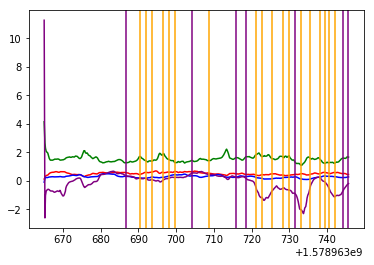

In [202]:
# Alpha Protocol:
# Simple redout of alpha power, divided by delta waves in order to rule out noise
alpha_over_delta = []
# Beta Protocol:
# Beta waves have been used as a measure of mental activity and concentration
# This beta over theta ratio is commonly used as neurofeedback for ADHD
beta_over_theta = []
# Alpha/Theta Protocol:
# This is another popular neurofeedback metric for stress reduction
# Higher theta over alpha is supposedly associated with reduced anxiety
theta_over_alpha = []
# Gamma/Beta:
# I suspect this may indicate when a person's intuition is at its strongest.
# Gamma waves have been associated with psi phenomena by multiple other researchers.
# Beta brainwaves are widely believed to inhibit psi.
gamma_over_beta = []
# here we go!
for x in range(len(smooth_deltas)):
    alpha_over_delta.append(smooth_alphas[x] / smooth_deltas[x])
    beta_over_theta.append(smooth_betas[x] / smooth_thetas[x])
    theta_over_alpha.append(smooth_thetas[x] / smooth_alphas[x])
    gamma_over_beta.append(smooth_gammas[x] / smooth_betas[x])
pyl.plot(timestamps, alpha_over_delta, color='r')
pyl.plot(timestamps, beta_over_theta, color='b')
pyl.plot(timestamps, theta_over_alpha, color='g')
pyl.plot(timestamps, gamma_over_beta, color='purple')
if table:
    for a in corrects:
        pyl.axvline(x=a, color='purple')
    for b in incorrects:
        pyl.axvline(x=b, color='orange')

In [0]:
curs.close()
db.close()